<a href="https://colab.research.google.com/github/gitclaudio23/DataMining/blob/main/Clustering_dataipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import pandas as pd
import numpy as np

# Accessing the file after mounting the drive
file_path = '/content/drive/MyDrive/IP___Riwayat_Medical_01012016 s.d 19032024_handled_lowercase_range.xlsx'
# Now you can use 'file_path' to access your file for further processing

# Load the data from the Excel file into a Pandas DataFrame called 'df'
df = pd.read_excel(file_path)

# Now you can process the DataFrame
data = df.select_dtypes(include=[np.number]).fillna(0)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

input_dim = data_scaled.shape[1]  # Jumlah fitur
encoding_dim = 32  # Dimensi laten (bisa diubah sesuai kebutuhan)

# Input Layer
# The Input object needs to be imported from tensorflow.keras.layers
input_layer = Input(shape=(input_dim,))

# Encoder
encoded = Dense(encoding_dim, activation='relu')(input_layer)

# Decoder
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Autoencoder Model
# The Model object also needs to be imported from tensorflow.keras.models
autoencoder = Model(inputs=input_layer, outputs=decoded)

# Compile Model
autoencoder.compile(optimizer='adam', loss='mse')

# Summary of the Model
autoencoder.summary()

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 2)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 162 (648.00 B)

 Trainable params: 162 (648.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Train the Autoencoder
history = autoencoder.fit(data_scaled, data_scaled,
                          epochs=50,
                          batch_size=32,
                          shuffle=True,
                          validation_split=0.2)

Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1355 - val_loss: 0.1166
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0579 - val_loss: 0.0779
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0276 - val_loss: 0.0451
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0159 - val_loss: 0.0225
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0080 - val_loss: 0.0102
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0041 - val_loss: 0.0051
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0024 - val_loss: 0.0030
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0016 - val_loss: 0.0021
Epoch 9/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 10/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.5127e-04 - val_loss: 0.0014
Epoch 11/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.6094e-04 - val_loss: 0.0013
Epoch 12/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s

In [ ]:
# Extract the encoder part of the model
encoder = Model(inputs=input_layer, outputs=encoded)

# Encode the data
encoded_data = encoder.predict(data_scaled)

# Decode the data
decoded_data = autoencoder.predict(data_scaled)

# Inverse transform to get original scale
decoded_data_original_scale = scaler.inverse_transform(decoded_data)

# Convert to DataFrame for better interpretation
encoded_df = pd.DataFrame(encoded_data, columns=[f'latent_{i}' for i in range(encoding_dim)])
decoded_df = pd.DataFrame(decoded_data_original_scale, columns=data.columns)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
output_path_encoded = '/content/drive/My Drive/encoded_data.xlsx'
output_path_decoded = '/content/drive/My Drive/decoded_data.xlsx'

# Save encoded and decoded data
encoded_df.to_excel(output_path_encoded, index=False)
decoded_df.to_excel(output_path_decoded, index=False)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


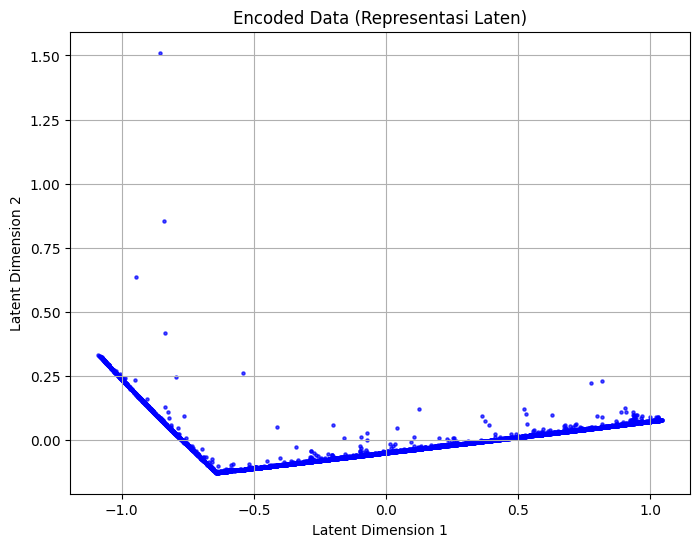

In [ ]:
from sklearn.decomposition import PCA

# Jika encoded data lebih dari 2 dimensi, gunakan PCA
if encoded_data.shape[1] > 2:
    pca = PCA(n_components=2)
    encoded_2d = pca.fit_transform(encoded_data)
else:
    encoded_2d = encoded_data

# Scatter plot untuk encoded data
plt.figure(figsize=(8,6))
plt.scatter(encoded_2d[:, 0], encoded_2d[:, 1], c='blue', s=5, alpha=0.7)
plt.title('Encoded Data (Representasi Laten)')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.grid(True)
plt.show()


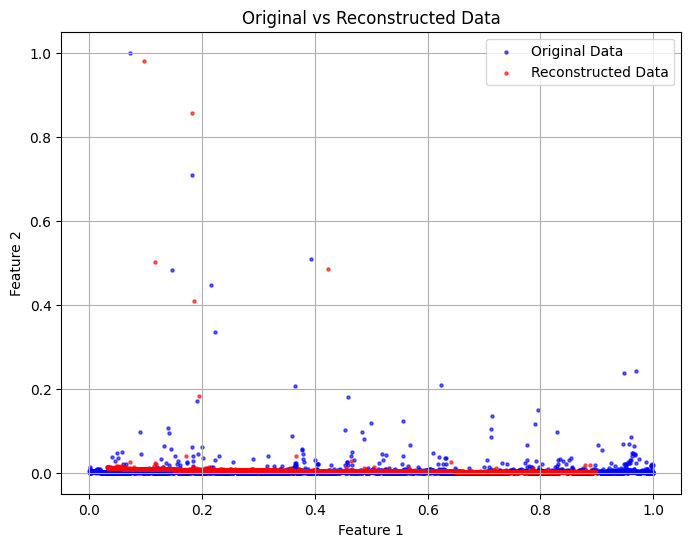

In [ ]:
# Pilih dua fitur untuk scatter plot (misalnya kolom pertama dan kedua dari data)
original_col_1 = data_scaled[:, 0]
original_col_2 = data_scaled[:, 1]

reconstructed_col_1 = decoded_data[:, 0]
reconstructed_col_2 = decoded_data[:, 1]

# Scatter plot untuk data asli dan hasil rekonstruksi
plt.figure(figsize=(8,6))
plt.scatter(original_col_1, original_col_2, c='blue', s=5, alpha=0.6, label='Original Data')
plt.scatter(reconstructed_col_1, reconstructed_col_2, c='red', s=5, alpha=0.6, label='Reconstructed Data')
plt.title('Original vs Reconstructed Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Train the Autoencoder
history = autoencoder.fit(data_scaled, data_scaled,
                          epochs=50,
                          batch_size=32,
                          shuffle=True,
                          validation_split=0.2)

# Encode and decode the data
encoded_data = encoder.predict(data_scaled)
decoded_data = autoencoder.predict(data_scaled)

# Inverse transform to original scale
decoded_data_original_scale = scaler.inverse_transform(decoded_data)

# Convert to DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=[f'latent_{i}' for i in range(encoding_dim)])
decoded_df = pd.DataFrame(decoded_data_original_scale, columns=data.columns)

# Save encoded and decoded data to Google Drive
output_path_encoded = '/content/drive/My Drive/encoded_data.xlsx'
output_path_decoded = '/content/drive/My Drive/decoded_data.xlsx'

encoded_df.to_excel(output_path_encoded, index=False)
decoded_df.to_excel(output_path_decoded, index=False)


Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.6371e-05 - val_loss: 0.0018
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.7605e-05 - val_loss: 0.0018
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.5867e-05 - val_loss: 0.0018
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.6461e-05 - val_loss: 0.0019
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.0546e-05 - val_loss: 0.0018
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.8939e-05 - val_loss: 0.0019
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.6886e-05 - val_loss: 0.0019
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.4423e-05 - val_loss: 0.0019
Epoch 9/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.2924e-05 - val_loss: 0.0020
Epoch 10/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.4856e-05 - val_loss: 0.0019
Epoch 11/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.2430e-05 - val_loss: 0.0019
Epoch 12

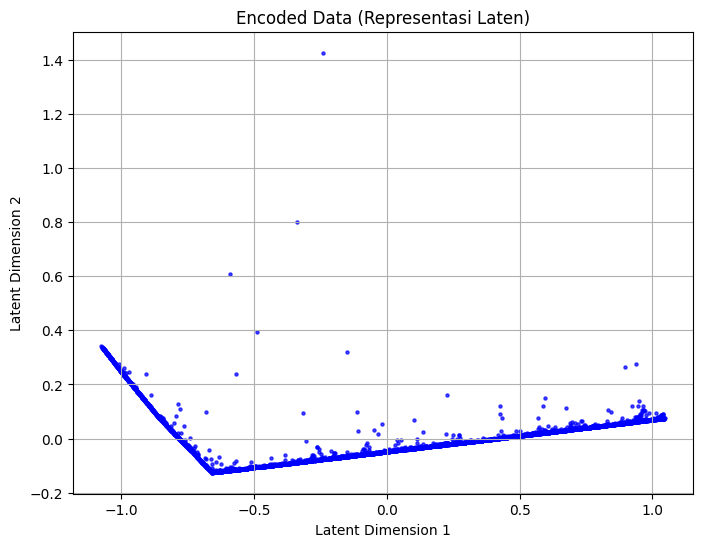

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Jika encoded data lebih dari 2 dimensi, gunakan PCA
if encoded_data.shape[1] > 2:
    pca = PCA(n_components=2)
    encoded_2d = pca.fit_transform(encoded_data)
else:
    encoded_2d = encoded_data

# Scatter plot untuk encoded data
plt.figure(figsize=(8,6))
plt.scatter(encoded_2d[:, 0], encoded_2d[:, 1], c='blue', s=5, alpha=0.7)
plt.title('Encoded Data (Representasi Laten)')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.grid(True)
plt.show()


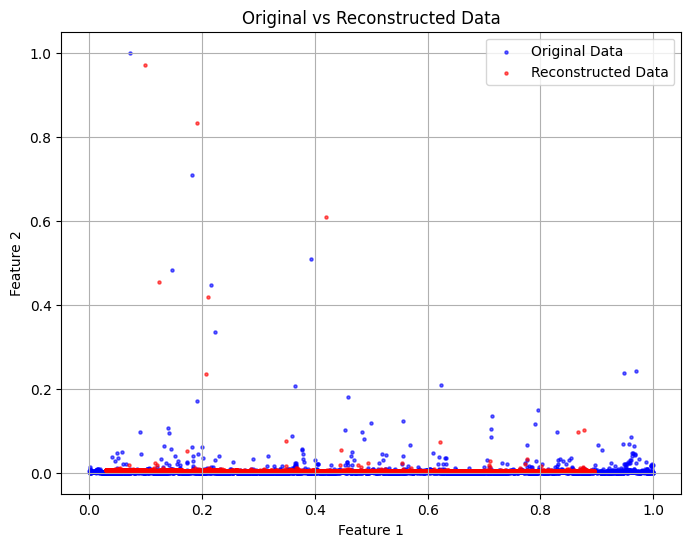

In [ ]:
# Scatter plot untuk data asli dan hasil rekonstruksi
plt.figure(figsize=(8,6))

# Pilih dua fitur pertama untuk scatter plot
original_col_1 = data_scaled[:, 0]
original_col_2 = data_scaled[:, 1]
reconstructed_col_1 = decoded_data[:, 0]
reconstructed_col_2 = decoded_data[:, 1]

plt.scatter(original_col_1, original_col_2, c='blue', s=5, alpha=0.6, label='Original Data')
plt.scatter(reconstructed_col_1, reconstructed_col_2, c='red', s=5, alpha=0.6, label='Reconstructed Data')

plt.title('Original vs Reconstructed Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


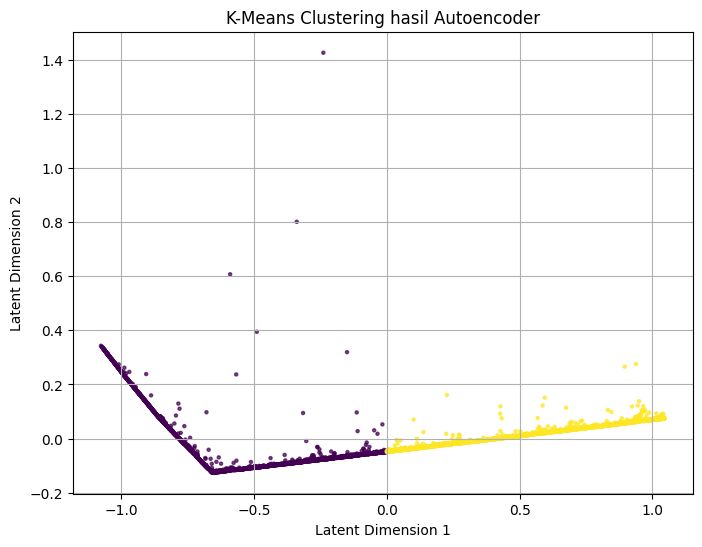

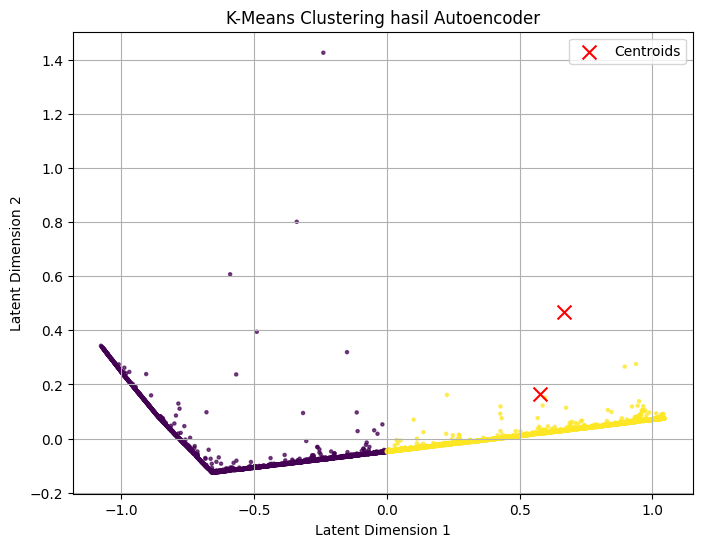

Jumlah cluster optimal: 2


In [ ]:
# prompt: Buatkan saya k-means cluster berdasarkan basic auto encoder dengan epoch 50 beserta tampilkan visualisasinya

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Asumsikan 'encoded_data' sudah didefinisikan dari hasil autoencoder

# Menentukan jumlah cluster optimal dengan Silhouette Score
silhouette_avg = []
for n_clusters in range(2, 11):
  kmeans = KMeans(n_clusters=n_clusters, random_state=42)
  cluster_labels = kmeans.fit_predict(encoded_data)
  silhouette_avg.append(silhouette_score(encoded_data, cluster_labels))

# Mencari jumlah cluster dengan silhouette score tertinggi
optimal_n_clusters = np.argmax(silhouette_avg) + 2

# Melakukan K-Means clustering dengan jumlah cluster optimal
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(encoded_data)

# Menampilkan visualisasi hasil clustering
plt.figure(figsize=(8, 6))
plt.scatter(encoded_2d[:, 0], encoded_2d[:, 1], c=cluster_labels, cmap='viridis', s=5, alpha=0.7)
plt.title('K-Means Clustering hasil Autoencoder')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.grid(True)
plt.show()

# Menambahkan centroid ke plot
plt.figure(figsize=(8, 6))
plt.scatter(encoded_2d[:, 0], encoded_2d[:, 1], c=cluster_labels, cmap='viridis', s=5, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=100, c='red', label='Centroids')
plt.title('K-Means Clustering hasil Autoencoder')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.legend()
plt.grid(True)
plt.show()

print(f"Jumlah cluster optimal: {optimal_n_clusters}")
